<a href="https://colab.research.google.com/github/AlinaOtr/data/blob/master/api_yandex_metrika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Получение данных

In [1]:
!pip install tapi-yandex-metrika==2022.4.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 253 kB 35.7 MB/s 
  Created wheel for tapi-yandex-metrika: filename=tapi_yandex_metrika-2022.4.8-py3-none-any.whl size=10721 sha256=b6305c6f9405152b284dc2ed6e7f519094c39a943ea6e4479210d4839f16326e
  Stored in directory: /root/.cache/pip/wheels/7c/18/11/fc79b76c6cad2aee1cf6ae8d95d33c1297cedbb5d88d133e39
  Created wheel for tapi-wrapper2: filename=tapi_wrapper2-0.1.3-py3-none-any.whl size=8876 sha256=8e543069dab6c058b31890a8700d62dec0d57399b1d4184bd06c1a918b0746db
  Stored in directory: /root/.cache/pip/wheels/c4/64/55/179c1030f1babdd0f8063a74524947dea8ea6ea9d0b446da50
Successfully built tapi-yandex-metrika tapi-wrapper2


In [2]:
! pip install python-dotenv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [56]:
from tapi_yandex_metrika import YandexMetrikaStats
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv
import requests

Токен и идентификатор счётчика хранятся в отдельном файле .env

In [4]:
env_path='/content/api_yandex_metrika.env'
load_dotenv(dotenv_path=env_path)
TOKEN = os.getenv("TOKEN")
METRIC_IDS = os.getenv("METRIC_IDS")

Создам объект для подключения к данным:

In [5]:
api = YandexMetrikaStats(
                    access_token = TOKEN
)

Получу данные за последние 30 дней:
* кол-во уникальных посетителей
* кол-во заходов на сайт
* кол-во загруженных страниц в браузере
* процент от общего количества посещений, в рамках которых состоялось не более одного просмотра страницы
* кол-во страниц, которые пользователь просмотрел за сессию
* среднюю продолжительность визитов (в секундах)

In [6]:
params = {
    'ids': METRIC_IDS, # из какого счетчика забираю данные
    'date1': "30daysAgo", # с какой даты формирую отчет
    'date2': "yesterday", # по какую дату формирую отчет
    'sort': "ym:s:date", # сортировка по дате визита
    'metrics': "ym:s:users, ym:s:visits, ym:s:pageviews,ym:s:bounceRate,ym:s:pageDepth,ym:s:avgVisitDurationSeconds", # какие величины запрашиваю
    'dimensions': "ym:s:date", # какие группировки использую
    'accuracy': "full", # точность вычисления результата
    'limit': 1000 # количество элементов на странице
}

Выполняю запрос и получаю данные из Yandex.Metrika API

In [7]:
raw_result = api.stats().get(params=params)
raw_result

<TapiClient object
{   'contains_sensitive_data': False,
    'data': [   {   'dimensions': [{'name': '2022-05-01'}],
                    'metrics': [2.0, 3.0, 5.0, 0.0, 1.66666667, 156.33333333]},
                {   'dimensions': [{'name': '2022-05-02'}],
                    'metrics': [5.0, 5.0, 6.0, 0.0, 1.2, 142.0]},
                {   'dimensions': [{'name': '2022-05-03'}],
                    'metrics': [5.0, 5.0, 5.0, 40.0, 1.0, 11.0]},
                {   'dimensions': [{'name': '2022-05-04'}],
                    'metrics': [4.0, 4.0, 4.0, 0.0, 1.0, 109.0]},
                {   'dimensions': [{'name': '2022-05-05'}],
                    'metrics': [5.0, 5.0, 5.0, 60.0, 1.0, 45.4]},
                {   'dimensions': [{'name': '2022-05-06'}],
                    'metrics': [5.0, 5.0, 7.0, 0.0, 1.4, 275.2]},
                {   'dimensions': [{'name': '2022-05-07'}],
                    'metrics': [2.0, 2.0, 2.0, 50.0, 1.0, 7.5]},
                {   'dimensions': [{'name': '202

In [8]:
result = raw_result['data']
result

[{'dimensions': [{'name': '2022-05-01'}],
  'metrics': [2.0, 3.0, 5.0, 0.0, 1.66666667, 156.33333333]},
 {'dimensions': [{'name': '2022-05-02'}],
  'metrics': [5.0, 5.0, 6.0, 0.0, 1.2, 142.0]},
 {'dimensions': [{'name': '2022-05-03'}],
  'metrics': [5.0, 5.0, 5.0, 40.0, 1.0, 11.0]},
 {'dimensions': [{'name': '2022-05-04'}],
  'metrics': [4.0, 4.0, 4.0, 0.0, 1.0, 109.0]},
 {'dimensions': [{'name': '2022-05-05'}],
  'metrics': [5.0, 5.0, 5.0, 60.0, 1.0, 45.4]},
 {'dimensions': [{'name': '2022-05-06'}],
  'metrics': [5.0, 5.0, 7.0, 0.0, 1.4, 275.2]},
 {'dimensions': [{'name': '2022-05-07'}],
  'metrics': [2.0, 2.0, 2.0, 50.0, 1.0, 7.5]},
 {'dimensions': [{'name': '2022-05-08'}],
  'metrics': [3.0, 3.0, 3.0, 0.0, 1.0, 18.33333333]},
 {'dimensions': [{'name': '2022-05-09'}],
  'metrics': [7.0, 7.0, 7.0, 14.28571429, 1.0, 50.28571429]},
 {'dimensions': [{'name': '2022-05-10'}],
  'metrics': [4.0, 6.0, 6.0, 16.66666667, 1.0, 136.83333333]},
 {'dimensions': [{'name': '2022-05-11'}],
  'metrics

Распарсим исходный list формата json в dict:

In [9]:
dict_data = {}

for i in range(0, len(result)):
    dict_data[i] = {
            'date':result[i]["dimensions"][0]["name"],
            'users':result[i]["metrics"][0],
            'visits':result[i]["metrics"][1],
            'pageviews':result[i]["metrics"][2],
            'bounceRate':result[i]["metrics"][3],
            'pageDepth':result[i]["metrics"][4],
            'avgVisitDurationSeconds':result[i]["metrics"][5]
          }
    
dict_data

{0: {'avgVisitDurationSeconds': 156.33333333,
  'bounceRate': 0.0,
  'date': '2022-05-01',
  'pageDepth': 1.66666667,
  'pageviews': 5.0,
  'users': 2.0,
  'visits': 3.0},
 1: {'avgVisitDurationSeconds': 142.0,
  'bounceRate': 0.0,
  'date': '2022-05-02',
  'pageDepth': 1.2,
  'pageviews': 6.0,
  'users': 5.0,
  'visits': 5.0},
 2: {'avgVisitDurationSeconds': 11.0,
  'bounceRate': 40.0,
  'date': '2022-05-03',
  'pageDepth': 1.0,
  'pageviews': 5.0,
  'users': 5.0,
  'visits': 5.0},
 3: {'avgVisitDurationSeconds': 109.0,
  'bounceRate': 0.0,
  'date': '2022-05-04',
  'pageDepth': 1.0,
  'pageviews': 4.0,
  'users': 4.0,
  'visits': 4.0},
 4: {'avgVisitDurationSeconds': 45.4,
  'bounceRate': 60.0,
  'date': '2022-05-05',
  'pageDepth': 1.0,
  'pageviews': 5.0,
  'users': 5.0,
  'visits': 5.0},
 5: {'avgVisitDurationSeconds': 275.2,
  'bounceRate': 0.0,
  'date': '2022-05-06',
  'pageDepth': 1.4,
  'pageviews': 7.0,
  'users': 5.0,
  'visits': 5.0},
 6: {'avgVisitDurationSeconds': 7.5,
 

Создам DataFrame из словаря:

In [10]:
dict_keys = dict_data[0].keys()
dict_keys

dict_keys(['date', 'users', 'visits', 'pageviews', 'bounceRate', 'pageDepth', 'avgVisitDurationSeconds'])

In [51]:
df = pd.DataFrame.from_dict(dict_data, orient='index',columns=dict_keys)
df.head()

,date,users,visits,pageviews,bounceRate,pageDepth,avgVisitDurationSeconds
0,2022-05-01,2.0,3.0,5.0,0.0,1.666667,156.333333
1,2022-05-02,5.0,5.0,6.0,0.0,1.200000,142.000000
2,2022-05-03,5.0,5.0,5.0,40.0,1.000000,11.000000
3,2022-05-04,4.0,4.0,4.0,0.0,1.000000,109.000000
4,2022-05-05,5.0,5.0,5.0,60.0,1.000000,45.400000


# Обработка данных

In [52]:
new_names = ['date', 'users', 'visits', 'pageviews', 'bounce_rate', 'page_depth', 'avg_visit_duration_seconds']
df.set_axis(new_names, axis = 'columns', inplace = True)

In [53]:
df['avg_visit_duration_min'] = round(df['avg_visit_duration_seconds'] / 60, 2)

In [26]:
df.head()

,date,users,visits,pageviews,bounce_rate,page_depth,avg_visit_duration_seconds,avg_visit_duration_min
0,2022-05-01,2.0,3.0,5.0,0.0,1.666667,156.333333,2.61
1,2022-05-02,5.0,5.0,6.0,0.0,1.200000,142.000000,2.37
2,2022-05-03,5.0,5.0,5.0,40.0,1.000000,11.000000,0.18
3,2022-05-04,4.0,4.0,4.0,0.0,1.000000,109.000000,1.82
4,2022-05-05,5.0,5.0,5.0,60.0,1.000000,45.400000,0.76


Определю выходные дни:

In [40]:
def check_weekend(date):
  res=len(pd.bdate_range(date,date))
  if res == 0:
    return 1 # выходной
  else:
    return 0 # рабочий

In [54]:
df['weekend'] = df.date.apply(check_weekend)
df.head(10)

,date,users,visits,pageviews,bounce_rate,page_depth,avg_visit_duration_seconds,avg_visit_duration_min,weekend
0,2022-05-01,2.0,3.0,5.0,0.000000,1.666667,156.333333,2.61,1
1,2022-05-02,5.0,5.0,6.0,0.000000,1.200000,142.000000,2.37,0
2,2022-05-03,5.0,5.0,5.0,40.000000,1.000000,11.000000,0.18,0
3,2022-05-04,4.0,4.0,4.0,0.000000,1.000000,109.000000,1.82,0
4,2022-05-05,5.0,5.0,5.0,60.000000,1.000000,45.400000,0.76,0
5,2022-05-06,5.0,5.0,7.0,0.000000,1.400000,275.200000,4.59,0
6,2022-05-07,2.0,2.0,2.0,50.000000,1.000000,7.500000,0.12,1
7,2022-05-08,3.0,3.0,3.0,0.000000,1.000000,18.333333,0.31,1
8,2022-05-09,7.0,7.0,7.0,14.285714,1.000000,50.285714,0.84,0
9,2022-05-10,4.0,6.0,6.0,16.666667,1.000000,136.833333,2.28,0


Определю, является ли дата праздником (или выходным):

In [48]:
year = "2022"
url = 'https://raw.githubusercontent.com/d10xa/holidays-calendar/master/json/consultant' + year + '.json'
r = requests.get(url)
cal = json.loads(r.text)

def check_holiday(data):
  return cal["holidays"].count(data)

In [55]:
df['holiday'] = df.date.apply(check_holiday)
df

,date,users,visits,pageviews,bounce_rate,page_depth,avg_visit_duration_seconds,avg_visit_duration_min,weekend,holiday
0,2022-05-01,2.0,3.0,5.0,0.000000,1.666667,156.333333,2.61,1,1
1,2022-05-02,5.0,5.0,6.0,0.000000,1.200000,142.000000,2.37,0,1
2,2022-05-03,5.0,5.0,5.0,40.000000,1.000000,11.000000,0.18,0,1
3,2022-05-04,4.0,4.0,4.0,0.000000,1.000000,109.000000,1.82,0,0
4,2022-05-05,5.0,5.0,5.0,60.000000,1.000000,45.400000,0.76,0,0
5,2022-05-06,5.0,5.0,7.0,0.000000,1.400000,275.200000,4.59,0,0
6,2022-05-07,2.0,2.0,2.0,50.000000,1.000000,7.500000,0.12,1,1
7,2022-05-08,3.0,3.0,3.0,0.000000,1.000000,18.333333,0.31,1,1
8,2022-05-09,7.0,7.0,7.0,14.285714,1.000000,50.285714,0.84,0,1
9,2022-05-10,4.0,6.0,6.0,16.666667,1.000000,136.833333,2.28,0,1


# Анализ и визуализация данных

Text(0, 0.5, 'Количество')

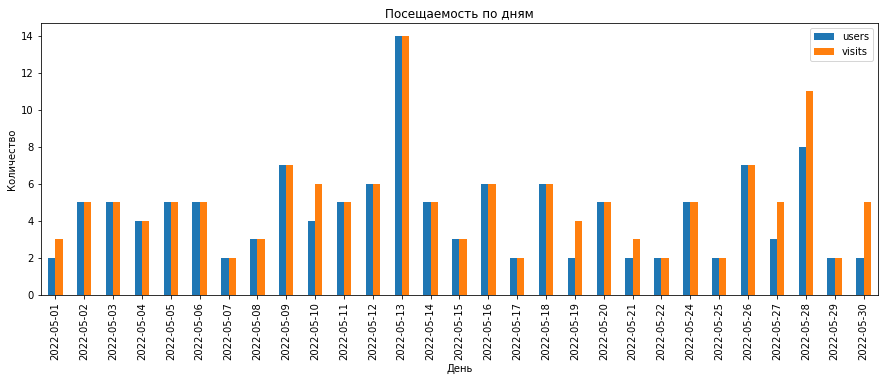

In [12]:
df.set_index('date')[['users', 'visits']].plot(kind='bar', figsize=(15, 5))
plt.title('Посещаемость по дням')
plt.xlabel('День')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество минут')

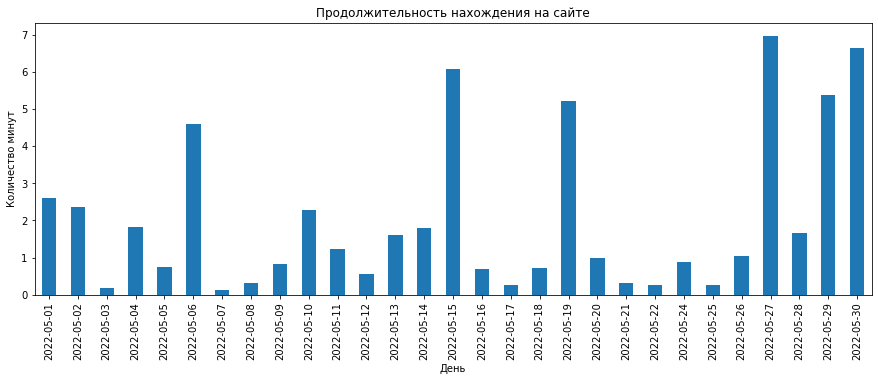

In [30]:
df.set_index('date')['avg_visit_duration_min'].plot(kind='bar', figsize=(15, 5))
plt.title('Продолжительность нахождения на сайте')
plt.xlabel('День')
plt.ylabel('Количество минут')